In [52]:
%pylab inline
%config InlineBackend.figure_format='retina'
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


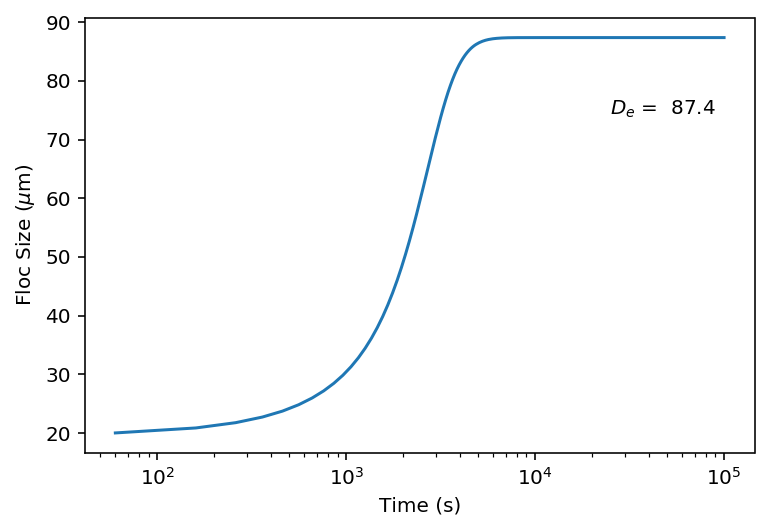

In [53]:
def dDdt(D, t, k):
    """
    ODE to be integrated: dDdt = A-B
    """
    # kind of constant:
    nf = 2.25
    p = 3.-nf
    q = 0.5
    Fy = 1e-10 # (N)
    rhos = 2500.  # (kg/m3)
    mu = 1.002e-3 # dynamic viscosity @ 20 degC (N s m-2)
    
    # adjustable (passed in in array k)
    Ka = k[0]
    Kb = k[1]
    Dp = k[2]
    G =  k[3]
    C =  k[4]
    
    # aggregation and breakup terms
    A = D**(4-nf)*Ka*Dp**(nf-3)*G*C/(nf*rhos)
    B = (D-Dp)**p * D**(2*q+1) *Kb *((Dp**(-p))/nf) *(mu/Fy)**q *G**(q+1)
    dfdt = A-B
    return dfdt


# adjustable params
Dp = 7e-6 # (m)
G = 35. # (s-1)
Ka = 0.73
Kb = 9.5e-6
C = 50.e-3 # (kg/m3)
k = np.array((Ka,Kb,Dp,G,C))

# initial values
D0 = 20e-6 # (m)
t = np.linspace(60,100000.,1000)
# integrate
D = odeint(dDdt,D0,t,args = (k,))

# De = last value
De = 1e6*D[-1]
ts = r"$D_e$ = {0:5.1f}".format(De[0])

# plot

fig, ax = plt.subplots()
ax.plot(t,1e6*D,label='$Floc size$')
ax.set_xscale('log'),
ax.set_xlabel('Time (s)')
ax.set_ylabel('Floc Size ($\mu$m)')
ax.text(0.25*t[-1],0.85*De,ts);

In [49]:
df_ps02 = pd.read_csv('data/03_PS2.csv')
df_ps02.head()

,Time_min,D16_micron,D50_micron,D84_micron
0,1.0,12.7335,20.6013,39.3249
1,2.0,13.2074,23.8470,45.4082
2,3.0,13.8934,25.3438,65.4272
3,4.0,14.1042,25.6631,49.8698
4,5.0,10.0286,19.1833,36.1036


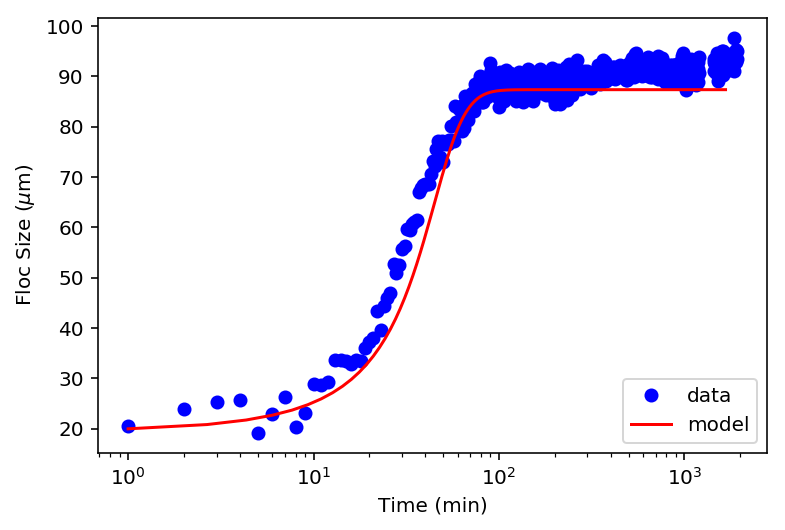

In [50]:
fig, ax = plt.subplots()
ax.plot(df_ps02['Time_min'],df_ps02['D50_micron'],'ob', label='data')
ax.plot(t/60,1e6*D,'r',label='model')
ax.set_xscale('log'),
ax.set_xlabel('Time (min)')
ax.set_ylabel('Floc Size ($\mu$m)')
legend(loc=4);